# Расчет тензора инерции для кельтского камня

In [5]:
from matplotlib.figure import Figure
import numpy as np
import matplotlib.figure
import matplotlib.pyplot as plt
plt.rcParams["text.latex.preamble"]=r"\usepackage{amsmath}"
matplotlib.pyplot.set_loglevel("critical")
plt.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  


# чтобы работала 3D-крутилка
%matplotlib ipympl  

# Работа с физическими величинами
%load_ext PhysicalQuantities.ipython

# Надо когда-нибудь попробовать и распространение ошибки, но тут это явно лишнее.
#from uncertainties import ufloat
#from uncertainties.umath import *

# Точность
%precision 1

The PhysicalQuantities.ipython extension is already loaded. To reload it, use:
  %reload_ext PhysicalQuantities.ipython


'%.1f'

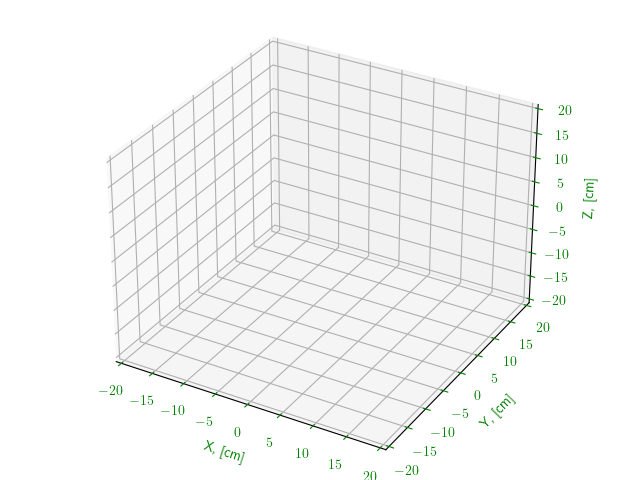

In [6]:
def draw_rattleback():
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1, projection='3d',  position=[0, 0, 1, 1])
        ax.grid(color='green')
        # ax.set_box_aspect(None, zoom=self.zoom_slider.value()/2)
        ax.set_xlabel('X, [cm]', color='green')
        ax.set_ylabel('Y, [cm]', color='green')
        ax.set_zlabel('Z, [cm]', color='green')
        ax.set_xlim([-20, 20])
        ax.set_ylim([-20, 20])
        ax.set_zlim([-20, 20])
        
        ax.tick_params(colors='green')
        return

draw_rattleback()

![](pics/rb-sizes-and-weight.svg)

In [7]:
Длина = 95.6mm
Ширина = 17.7mm
Высота = 10.9mm
Вес = 11g 

Длина, Ширина, Высота, Вес

(95.6 mm, 17.7 mm, 10.9 mm, 11 g)

![](pics/rb-for-volume-density.svg)

In [8]:
Вес_с_водой = 479g
Вес_без_воды = 251g
Вес_с_водой_и_камнями = 501g
Высота_без_камней = 70.5mm
Высота_c_камнями = 75.7mm
Диаметр_стакана = 71.1mm

Объем_камней = np.pi * Диаметр_стакана**2 / 4 * (Высота_c_камнями - Высота_без_камней)
#Объем_воды = np.pi * Диаметр_стакана**2 / 4 * Высота_без_камней
Плотность_камней = (Вес_с_водой_и_камнями - Вес_с_водой) / Объем_камней
#Плотность_воды = (Вес_с_водой - Вес_без_воды) / Объем_воды
Плотность_камней.to("kg/m**3") #, Плотность_воды.to("kg/m**3")
# Грубо, но в порядок плотностей пластиков попадает.


1065.6 $\frac{\text{kg}}{\text{m}^3}$

Полуось $x_a$ в сантиметрах:

In [9]:
a = Длина.to('cm').value/2
a 

4.8

Полуось $x_b$ в сантиметрах:

In [10]:
b = Ширина.to('cm').value/2
b

0.9

Полуось $x_с$ в сантиметрах:

In [11]:
c = Высота.to('cm').value/2
c

0.5

Плотность «кг/м^3»

In [12]:
density = Плотность_камней.to("kg/m**3").value
density

1065.6

Угол отклонения в градусах

In [13]:
angle=30

Длина отклонения в см.

In [14]:
lenght=3

Масса отклонения (граммы)

In [15]:
devmass=3

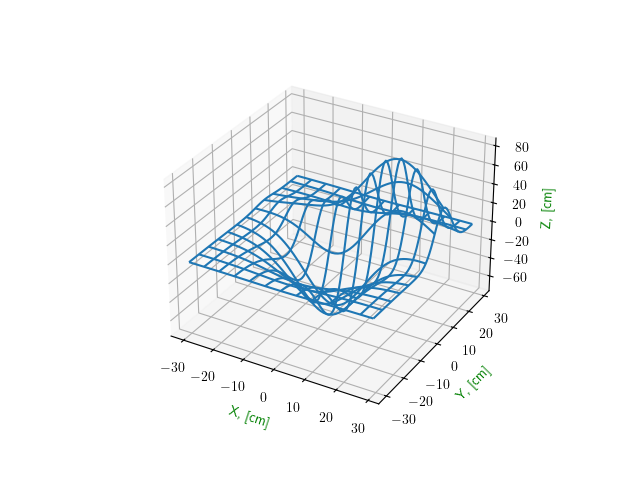

In [16]:
# Временная тренировка, как рисовать 3D график, с подграфиками, если забуду. Потом надо будет удалить наверно.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X, [cm]', color='green')
ax.set_ylabel('Y, [cm]', color='green')
ax.set_zlabel('Z, [cm]', color='green')

X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)



In [17]:
def текст_для_тензора(I, заголовок):
    латех_для_матрицы = ''
    латех_строки_матрицы = []
    for i in range(I.shape[0]):
        латех_строка_матрицы = ' & '.join([f'{I[i, j]:.5f}' for j in range(I.shape[1])])
        латех_строки_матрицы.append(латех_строка_матрицы) 
    латех_для_матрицы = rf'''
        $\hspace*{{1cm}}\text{{ {заголовок} }} \small \begin{{bmatrix}} \frac{{kg*m^2}}{{10^6}} \end{{bmatrix}} \\ \normalsize \hspace*{{2cm}} \begin{{bmatrix}} ''' + r' \\ '.join(латех_строки_матрицы) + rf''' \end{{bmatrix}} $        ''' 
    return латех_для_матрицы   

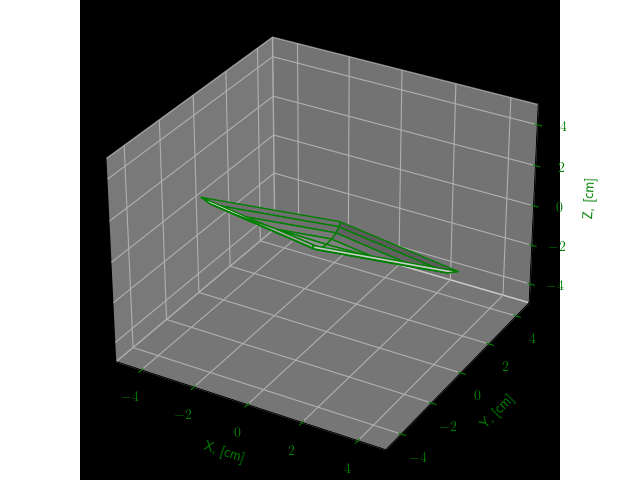

In [18]:
def визуализируем_камень():
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1, projection='3d',  position=[0, 0, 1, 1])
        ax.set_facecolor('black')
        ax.grid(color='green')

        ax.set_xlabel('X, [cm]', color='green')
        ax.set_ylabel('Y, [cm]', color='green')
        ax.set_zlabel('Z, [cm]', color='green')

        # возьмем по длине камня
        длина_ребра_куба = a 
        ax.set_xlim([-длина_ребра_куба, длина_ребра_куба])
        ax.set_ylim([-длина_ребра_куба, длина_ребра_куба])
        ax.set_zlim([-длина_ребра_куба, длина_ребра_куба])
        
        ax.tick_params(colors='green')

        точек_в_поверхности = 5
        # угол по YAW-плоскости
        u = np.linspace(0, 2 * np.pi, точек_в_поверхности)
        # угол по нижней полусфере
        v = np.linspace(np.pi/2, np.pi, точек_в_поверхности)
        
        x = a * np.outer(np.cos(u), np.sin(v))
        y = b * np.outer(np.sin(u), np.sin(v))
        z = c * np.outer(np.ones(np.size(u)), np.cos(v))

        ax.plot_surface(x, y, z, color='white', edgecolor='green', zorder = 0.5)

        return

        u1 = np.linspace(0, 2 * np.pi, 100)
        v1 = np.linspace(np.pi/2, np.pi, 100)
        x1 = a * np.outer(np.cos(u1), np.sin(v1))
        y1 = b * np.outer(np.sin(u1), np.sin(v1))
        z1 = 0 * np.outer(np.ones(np.size(u1)), np.cos(v1))
  
        
        ra=a*0.01
        rb=b*0.01
        rc=c*0.01
        xchange = 2 * devmass * 0.001 * ((lenght*0.01*np.sin(np.radians(angle)))**2)
        ychange = 2 * devmass * 0.001 * ((lenght*0.01*np.cos(np.radians(angle)))**2)
        xychange = -1 *devmass * 0.001 * (lenght**2)*(np.sin(np.radians(angle*2)))
        rmass = ( 2 * np.pi * ra * rb * rc * density) / (3*10)

        I_1 = np.array([
            [rb**2 + rc**2, 0, 0],      
            [0,  ra**2+rc**2,  0],      
            [0,  0,  ra**2 + rb**2],      
        ]) * rmass * (10**6) 

        I_r = I_1 + np.array([
            [xchange, xychange, 0],      
            [xychange,  ychange,  0],      
            [0,  0,  xchange+ychange],      
        ]) 

        ax.text2D(0, 1, текст_для_тензора(I_1, 'Tensor of Inertia'), transform=ax.transAxes, fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        ax.text2D(0.7, 1, текст_для_тензора(I_r, 'Tensor of Inertia2'), transform=ax.transAxes, fontsize=15, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        ax.plot_surface(x, y, z, color='white')
        ax.plot_surface(x1, y1, z1, color = 'white', zorder = 1)
        ax.quiver(-длина_ребра_куба, длина_ребра_куба, -длина_ребра_куба, длина_ребра_куба, 0, 0, color='red', alpha=1, lw=3, zorder = 10000) 
        ax.quiver(-длина_ребра_куба, длина_ребра_куба, -длина_ребра_куба, 0, длина_ребра_куба, 0, color='green', alpha=1, lw=3)  
        ax.quiver(-длина_ребра_куба, длина_ребра_куба, -длина_ребра_куба, 0, 0, длина_ребра_куба, color='blue', alpha=1, lw=3)

визуализируем_камень()